#Задание 1


Реализуйте класс LinearRegressionSGD c обучением и и применением линейной регрессии, построенной с помощью стохастического градиентного спуска, с заданным интерфейсом.

Обратите внимание на следуюшие моменты:

Схожий класс использовался в лекции
Выбирайте 10 случайных сэмплов (равномерно) каждый раз.
Используйте параметры по умолчанию (epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8)
Выход из цикла осуществуется по сравнению 2-нормы разницы весов с epsilon, а функция потерь - MSE.
Визуализируйте траекторию градиентного спуска (как в лекции)

##Решение:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
np.random.seed(0)

In [2]:
from sklearn.base import BaseEstimator

class LinearRegressionSGD(BaseEstimator):
    def __init__(self, epsilon=1e-6, max_steps=10000, w0=None, alpha=1e-8):
        self.epsilon = epsilon
        self.max_steps = max_steps
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.w_history = []

In [3]:
def fit(self, X, y):
        l,d = X.shape 
        if self.w0 is None:
            self.w0 = np.zeros(d)
        self.w = self.w0
        for step in range(self.max_steps):
            self.w_history.append(self.w)
            w_new = self.w - self.alpha * self.calc_gradient(X, y)
            if (np.linalg.norm(w_new - self.w) < self.epsilon):
                break
            self.w = w_new
        return self

In [4]:
def predict(self, X):
        if self.w is None:
            raise Exception("Пока не обучена")  
        y_pred = np.dot(X, self.w)
        return y_pred

In [5]:
def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = np.zeros((d, ))
        indeces = np.random.randint(0, d, (10, ))
        return (2/l) * np.dot(X.T,(np.dot(X, self.w) - y))

Визуализация

In [6]:
random_seed = 45
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43
np.random.seed(random_seed)
w_true = np.random.normal(size=(n_features, ))
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [7]:
np.random.seed(random_seed)
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2
for i in range(num_steps):
    w -= (step_size * 2 * X.T @ (X @ w - Y))/Y.size 
    w_list.append(w.copy())
w_list = np.array(w_list)

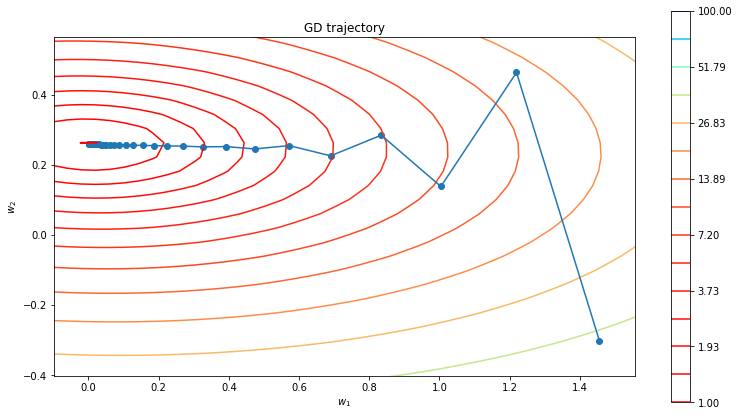

In [8]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])
plt.show()

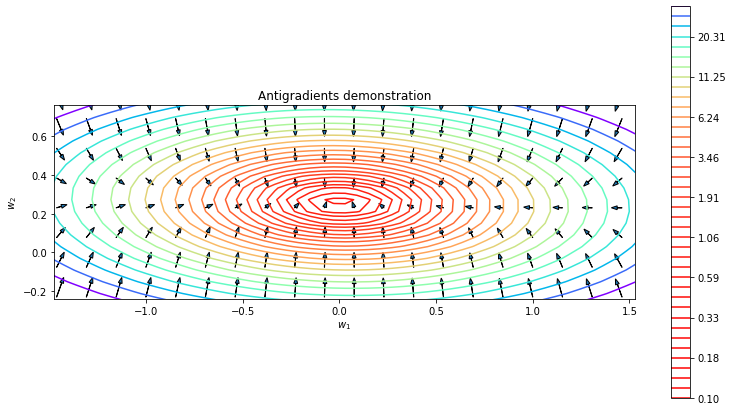

In [9]:
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-3, 3, 40), np.linspace(-3, 3, 40))
levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2 * 1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)
plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .5))
plt.gca().set_aspect('equal')
plt.show()

Рассмотрим стохастический градиентный спуск. Пусть количество элементов, вычисленных функцией потерь для каждого состояния равно 10.


In [11]:
np.random.seed(random_seed)
batch_size = 10
w = w_0.copy()
w_history_list = [w.copy()]
lr = 1e-2
for i in range(num_steps):
    sample_indices = np.random.randint(0, n_objects,size = batch_size)
    w -= (step_size * 2 * X[sample_indices,:].T @ (X[sample_indices,:] @ w - Y[sample_indices]))/Y[sample_indices].size 
    w_history_list.append(w.copy())
w_history_list = np.array(w_history_list)

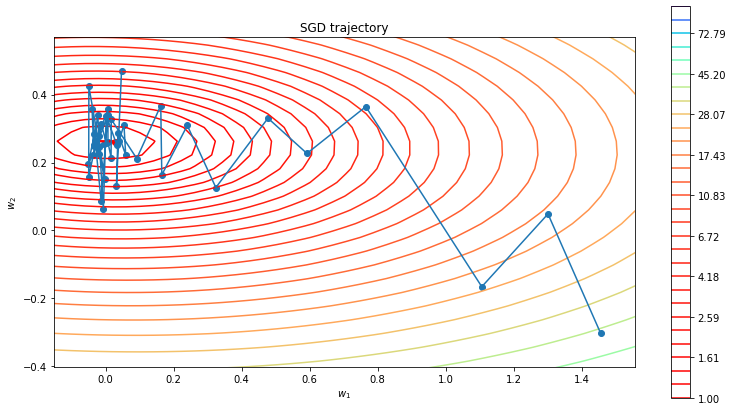

In [12]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_history_list[:, 0].min() - 0.1, w_history_list[:, 0].max() + 0.1))
plt.ylim((w_history_list[:, 1].min() - 0.1, w_history_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_history_list[:, 0], w_history_list[:, 1])
plt.plot(w_history_list[:, 0], w_history_list[:, 1])
plt.show()

In [13]:
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.02
for i in range(num_steps):
    lr = lr_0 / ((i+1) ** .505) 
    sample_indices = np.random.randint(0, n_objects, size=batch_size) 
    X_sample = X[sample_indices, :]
    Y_sample = Y[sample_indices]
    w -= (lr * 2 * X[sample_indices,:].T @ (X[sample_indices,:] @ w - Y[sample_indices]))/Y[sample_indices].size 
    w_list.append(w.copy())
w_list = np.array(w_list)

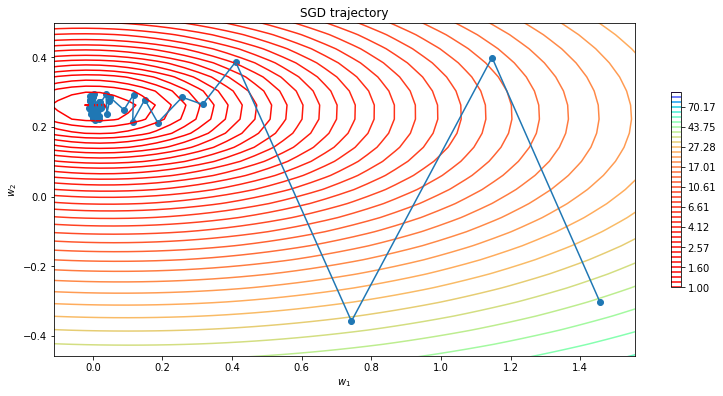

In [14]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.4, extend='both')
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])
plt.show()

Сравним скорости

In [15]:
n_features = 50
n_objects = 1000
num_steps = 500
batch_size = 10
w_true = np.random.uniform(-2, 2, n_features)
X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

In [16]:
lr_sgd = 1e-3
lr_gd = 1e-3
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]
for i in range(num_steps):
    lr = lr_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w_sgd -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    w_gd -= 2 * lr_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))

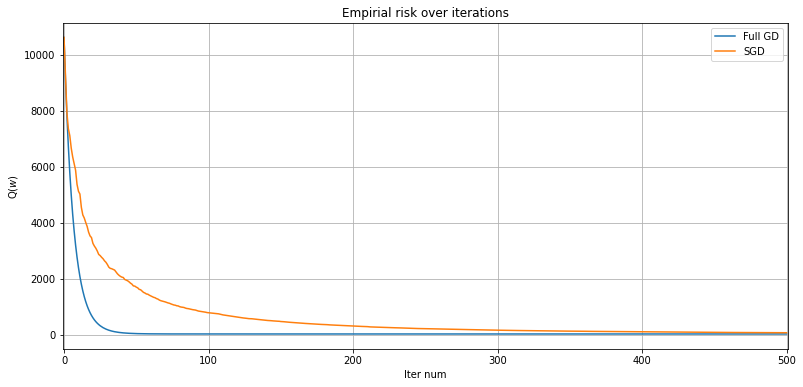

In [17]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), residuals_gd, label='Full GD')
plt.plot(range(num_steps+1), residuals_sgd, label='SGD')
plt.title('Empirial risk over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()